In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
#script to search for human ppi graph centrality measures of proteins
ebv = pd.read_csv("centrality_inter_ebv.csv")
hhv1 = pd.read_csv("centrality_inter_hhv1.csv")
human = pd.read_csv("centrality_dna.csv")

In [80]:
h_prot_id = list(human['prot_id'])
h_deg = list(human['degree_centrality'])
h_close = list(human['closeness_centrality'])
h_subg = list(human['subgraph_centrality'])
ebv_prot_id = list(ebv['prot_id'])
hhv_prot_id = list(hhv1['prot_id'])
ebv_hdeg = []
ebv_hclose = []
ebv_hsubg = []
hhv_hdeg = []
hhv_hclose = []
hhv_hsubg = []

In [81]:
#adding the respective measures to lists
for i in range(0,len(ebv_prot_id)):
    if ebv_prot_id[i] in h_prot_id:
        index = h_prot_id.index(ebv_prot_id[i])
        ebv_hdeg.append(h_deg[index])
        ebv_hclose.append(h_close[index])
        ebv_hsubg.append(h_subg[index])
    else:
        ebv_hdeg.append(0)
        ebv_hclose.append(0)
        ebv_hsubg.append(h_subg[index])

In [82]:
for i in range(0,len(hhv_prot_id)):
    if hhv_prot_id[i] in h_prot_id:
        index = h_prot_id.index(hhv_prot_id[i])
        hhv_hdeg.append(h_deg[index])
        hhv_hclose.append(h_close[index])
        hhv_hsubg.append(h_subg[index])
    else:
        hhv_hdeg.append(0)
        hhv_hclose.append(0)
        hhv_hsubg.append(h_subg[index])


In [83]:
#adding new columns to datafram
ebv['hdeg']=ebv_hdeg
ebv['hclose']=ebv_hclose
ebv['hsubg']=ebv_hsubg
ebv['prot']=list(range(1,len(ebv_prot_id)+1))

In [84]:
hhv1['hdeg']=hhv_hdeg
hhv1['hclose']=hhv_hclose
hhv1['hsubg']=hhv_hsubg
hhv1['prot']=list(range(1,len(hhv_prot_id)+1))

In [91]:
ebv = ebv[['prot','prot_id','degree_centrality','closeness_centrality','subgraph_centrality','hdeg','hclose','hsubg']]
ebv.to_csv("ebv_comp.csv",index=False)
hhv1.to_csv("hhv1_comp.csv",index=False)



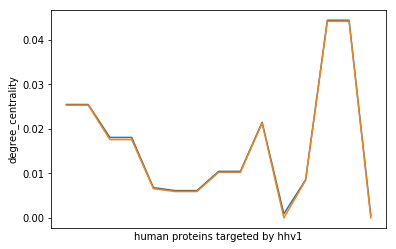

In [97]:
#script to analyze the measures and compare
plt.plot('prot',"degree_centrality", data=hhv1)
plt.plot('prot',"hdeg", data=hhv1)
plt.xticks([], [])
plt.xlabel("human proteins targeted by hhv1")
plt.ylabel("degree_centrality")
plt.show()

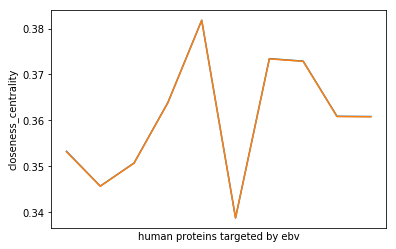

In [95]:
plt.plot('prot',"closeness_centrality", data=hhv1)
plt.plot('prot',"hclose", data=hhv1)
plt.xticks([], [])
plt.xlabel("human proteins targeted by hhv1")
plt.ylabel("closeness_centrality")
plt.show()

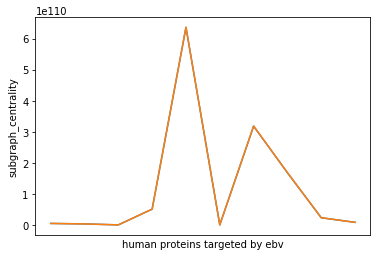

In [96]:
plt.plot('prot',"subgraph_centrality", data=hhv1)
plt.plot('prot',"hsubg", data=hhv1)
plt.xticks([], [])
plt.xlabel("human proteins targeted by hhv1")
plt.ylabel("subgraph_centrality")
plt.show()

In [3]:
#generating bar plots for comaparison
ebv = pd.read_csv("ebv_comp.csv")
hhv1 = pd.read_csv("hhv1_comp.csv")